In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Initial imports
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression



In [3]:
# columns = ["country", "description", "points", "price", "province", "taster_name", "title", "variety", "winery"]

# target = ["points"]


In [4]:
#  Import and read the csv file(s)
#file_path = "../Mod20_Group_Challenge/iris.csv"
wine_df=pd.read_csv("data_cleaning/cleaned_wine_data.csv")
wine_df.head(10)

,country,description,points,price,province,taster_name,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
5,Italy,"Here's a bright, informal red that opens with ...",87,16,Sicily & Sardinia,Kerin O'Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
6,France,This dry and restrained wine offers spice in p...,87,24,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewurztraminer,Trimbach
7,Germany,Savory dried thyme notes accent sunnier flavor...,87,12,Rheinhessen,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewurztraminer (Rheinhe...,Gewurztraminer,Heinz Eifel
8,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
9,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Virginie Boone,Kirkland Signature 2011 Mountain Cuvee Caberne...,Cabernet Sauvignon,Kirkland Signature


In [5]:
# Pull in top keywords
keywords = ['ripe', 'crisp', 'bright', 'dry', 'full', 'sweet', 'fresh', 'earthy', 'bitter', 'aftertaste']
for k in keywords:
    wine_df[k] = wine_df.description.apply(lambda x : 1 if x.find(k)>-1 else 0)
wine_df.head()

,country,description,points,price,province,taster_name,title,variety,winery,ripe,crisp,bright,dry,full,sweet,fresh,earthy,bitter,aftertaste
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,0,0,0,0,0,1,0,0,0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,1,0,0,0,0,0,0,0,0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,0,0,1,0,0,0,0,0,0
3,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,0,1,0,0
4,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,1,0,1,0,0,0


In [6]:
print(wine_df.dtypes)

country        object
description    object
points          int64
price           int64
province       object
taster_name    object
title          object
variety        object
winery         object
ripe            int64
crisp           int64
bright          int64
dry             int64
full            int64
sweet           int64
fresh           int64
earthy          int64
bitter          int64
aftertaste      int64
dtype: object


In [7]:
wine_df.nunique()

country           42
description    88243
points            21
price            381
province         419
taster_name       19
title          87491
variety          654
winery         13821
ripe               2
crisp              2
bright             2
dry                2
full               2
sweet              2
fresh              2
earthy             2
bitter             2
aftertaste         2
dtype: int64

In [8]:
def getPoints(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'
    else:
        return 'If this gets hit, we did something wrong!'

In [9]:
wine_df['Points'] = wine_df['points'].apply(getPoints)

<AxesSubplot:xlabel='Points', ylabel='price'>

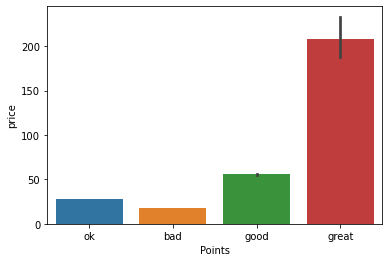

In [10]:
sns.barplot(x = 'Points', y = 'price', data = wine_df)

In [11]:
# def getPriceRange(price):
#     if(price <= 30):
#         return '1-30'
#     elif(price<=50):
#         return '31-50'
#     elif(price<=100): 
#         return '51-100'
#     elif(math.isnan(price)):
#         return '0'
#     else:
#         return 'Above 100'

In [12]:
# wine_df['priceRange'] = wine_df['price'].apply(getPriceRange)

In [13]:
# wine_df.groupby(wine_df['priceRange']).size()

In [14]:
wine_df.head()

,country,description,points,price,province,taster_name,title,variety,winery,ripe,crisp,bright,dry,full,sweet,fresh,earthy,bitter,aftertaste,Points
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,0,0,0,0,0,1,0,0,0,ok
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,1,0,0,0,0,0,0,0,0,ok
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,0,0,1,0,0,0,0,0,0,ok
3,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,0,1,0,0,ok
4,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,1,0,1,0,0,0,ok


In [15]:
wine_df.dtypes

country        object
description    object
points          int64
price           int64
province       object
taster_name    object
title          object
variety        object
winery         object
ripe            int64
crisp           int64
bright          int64
dry             int64
full            int64
sweet           int64
fresh           int64
earthy          int64
bitter          int64
aftertaste      int64
Points         object
dtype: object

In [16]:
country_counts=wine_df.country.value_counts()
country_counts

US                        37511
France                    17525
Italy                     10121
Spain                      6509
Portugal                   4870
Chile                      4305
Argentina                  3753
Austria                    2791
Germany                    2093
Australia                  2007
New Zealand                1270
South Africa               1220
Israel                      484
Greece                      461
Canada                      253
Hungary                     144
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Georgia                      84
Slovenia                     80
Croatia                      71
England                      69
Mexico                       65
Moldova                      59
Brazil                       47
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [17]:
# Determine which values to replace if counts are less than ..?
replace_country = list(country_counts[country_counts < 2000].index)

# Replace in dataframe
for coun in replace_country:
    wine_df.country= wine_df.country.replace(coun,"Other")
    
# Check to make sure binning was successful
wine_df.country.value_counts()

US           37511
France       17525
Italy        10121
Spain         6509
Other         4935
Portugal      4870
Chile         4305
Argentina     3753
Austria       2791
Germany       2093
Australia     2007
Name: country, dtype: int64

In [18]:
variety_counts=wine_df.variety.value_counts()
variety_counts

Pinot Noir                  9833
Chardonnay                  8292
Red Blend                   6842
Cabernet Sauvignon          6198
Bordeaux-style Red Blend    4816
                            ... 
Manzoni                        1
Syrah-Grenache-Viognier        1
Fruburgunder                   1
Chardonnay-Riesling            1
Bobal-Cabernet Sauvignon       1
Name: variety, Length: 654, dtype: int64

In [19]:
# Determine which values to replace if counts are less than ..?
replace_variety = list(variety_counts[variety_counts < 2000].index)

# Replace in dataframe
for var in replace_variety:
    wine_df.variety= wine_df.variety.replace(var,"Other")
    
# Check to make sure binning was successful
wine_df.variety.value_counts()

Other                       38956
Pinot Noir                   9833
Chardonnay                   8292
Red Blend                    6842
Cabernet Sauvignon           6198
Bordeaux-style Red Blend     4816
Riesling                     4722
Sauvignon Blanc              3838
Syrah                        3103
Rose                         3032
Malbec                       2524
Portuguese Red               2196
Merlot                       2068
Name: variety, dtype: int64

In [20]:
wine_df = wine_df.drop(columns=['description', 'province', 'title', 'winery', 'taster_name'], axis=1) 

In [21]:
# # hot encoding for country and taster name as they are limited categories. 
wine_df = pd.get_dummies(wine_df, columns=['country', 'variety'])

In [22]:
wine_df.head()

,points,price,ripe,crisp,bright,dry,full,sweet,fresh,earthy,...,variety_Malbec,variety_Merlot,variety_Other,variety_Pinot Noir,variety_Portuguese Red,variety_Red Blend,variety_Riesling,variety_Rose,variety_Sauvignon Blanc,variety_Syrah
0,87,15,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,87,14,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,87,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,87,65,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,87,15,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
wine_df.dtypes

points                               int64
price                                int64
ripe                                 int64
crisp                                int64
bright                               int64
dry                                  int64
full                                 int64
sweet                                int64
fresh                                int64
earthy                               int64
bitter                               int64
aftertaste                           int64
Points                              object
country_Argentina                    uint8
country_Australia                    uint8
country_Austria                      uint8
country_Chile                        uint8
country_France                       uint8
country_Germany                      uint8
country_Italy                        uint8
country_Other                        uint8
country_Portugal                     uint8
country_Spain                        uint8
country_US 

In [24]:
# Split our preprocessed data into our features and target arrays
y = wine_df["Points"].values
X = wine_df.drop(["Points"],1).values

C:\Users\M154499\AppData\Local\Temp/ipykernel_14756/4187228370.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = wine_df.drop(["Points"],1).values


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [26]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=100)
model = lr.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

C:\Users\M154499\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M154499\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Accuracy is 0.70457373988799


C:\Users\M154499\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
